# Inner and outer noise effects on round-trip time measurements

In this notebook we investigate the effects that the noise has on that round-trip time (RTT) measurements and we explain how we  represent such effects in our model.  

In Fig.1 , we show real RTT data obtained in [[1]](#References) from the ultra-wide band testbed of [[2]](#References)
  using this RTT scheme, accompanied by an example model fit.
  
![RTT_experimental](RTT_experimental.png)
  Fig.1 also exemplifies the two distinct effects that random deviations of the physical parameters
  can produce on the data. 
  On one hand, large jumps of approximately $T_\mathcal{S}$ in the measured RTT are observed (effect i])
  if a random deviation influences the specific clock period at which $\mathcal{S}$
  reads the arrival of a ping pulse from its TDC, i.e., it changes which is the first up-flank in $\mathcal{S}$'s clock after the ping 
  pulse arrives. On the other hand, if this does not happen, random deviations appear directly in the signal as additive noise 
  (effect ii]). From a modeling perspective, these 
  two effects are not easily represented distinctively. Indeed, variations of the transmission time from $\mathcal{M}$ to $\mathcal{S}$, or jitter in any of the two clock periods, $T_\mathcal{M}$ or $T_\mathcal{S}$, could lead to any of the two described effects, while variations
  of the transmission time from $\mathcal{S}$ to $\mathcal{M}$, can only ever lead to effect ii]. In this paper, we will consider 
  the effect of random variations on the physical parameters, as well as the quantization by the TDC, in the form of two additive 
  white noise processes, one inside, indicated by $V[n]$, and one outside the nonlinearity, indicated by $W[n]$. 
 In short, we model the observed data as 
$$
Y[n] = \delta_0 + W[n] + \frac{2\rho}{c} + T_\mathcal{S} \mathrm{mod}_{1}\!\left( f_\mathrm{d} T_\mathrm{s} n + \frac{\phi_\mathrm{d}}{2\pi} + V[n] \right)
$$
where the outer noise $W[n]$ and the inner noise $V[n]$ are independent white processes such that $V[n]\sim\mathcal{N}(0,\sigma_w^2)$ and $W[n]\sim\mathcal{N}(0,\sigma_v^2)$.

| Parameter | Meaning | Known to $\mathcal{M}$ |
| -- | -- | -- |
| $\delta_0$ | Delay introduced by $\mathcal{S}$, in seconds. | Yes. |
| $\rho$ | Range between $\mathcal{S}$ and $\mathcal{M}$, in meters. | No. **To be estimated.** |
| $T_\mathcal{S}$ | Period of $\mathcal{S}$'s clock, in seconds. | No. |
| $T_\mathrm{s} $ | Sampling period used by $\mathcal{M}$, in seconds. | Yes. |
| $f_\mathrm{d}$ | Frequency difference between $\mathcal{S}$ and $\mathcal{M}$, in Hertz. | No. **To be estimated.** |
| $\phi_\mathrm{d}$ | Phase parameter, in radians. | No. **To be estimated.** |
| $\sigma_v$ | Standard deviation of the clock jitter (inside the modulus). | Yes. |
| $\sigma_w$ | Standard deviation of other noise sources (outside the modulus). | Yes. |

<a id="References"></a>
# References

[[1]](https://ieeexplore.ieee.org/document/7102694) S. Dwivedi, A. D. Angelis, D. Zachariah, and P. H¨andel, “Joint rangingand clock parameter estimation by wireless round trip time measurements,” IEEE Journal on Selected Areas in Communications, vol. 33, no. 11, pp. 2379–2390, Nov. 2015.

[[2]](https://ieeexplore.ieee.org/document/6471216) A. D. Angelis, S. Dwivedi, and P. H¨andel, “Characterization of a flexible UWB sensor for indoor localization,” IEEE Transactions on Instrumentation and Measurement, vol. 62, no. 5, pp. 905–913, May 2013.

[[3]] our paper

# imports,configurations and flags

In [1]:
# Import both external libraries and our own basic functions
%run imports_and_library_of_basic_functions.ipynb

In [2]:
def generate_signal( N = 200, frequency_d = 100,phase_d = 2.1,rho = 4, delta_0 = 5 * 10**(-6), T_sampling = 200 * 10**(-6),
                    T_slave = 10**(-8), w_std = 10**(-9), v_std = 10**(-9), c = 3*10**8 ):
    
    n = np.linspace(0, (N-1), N );
    np.random.seed(1)
    noise_w=np.random.randn( N )
    noise_v=np.random.randn( N )

    y = ( (frequency_d * n * T_sampling + phase_d/(2 * np.pi) + noise_v * v_std)%(1) ) * T_slave + (
        delta_0) + 2 * rho/c + noise_w * w_std

    return y

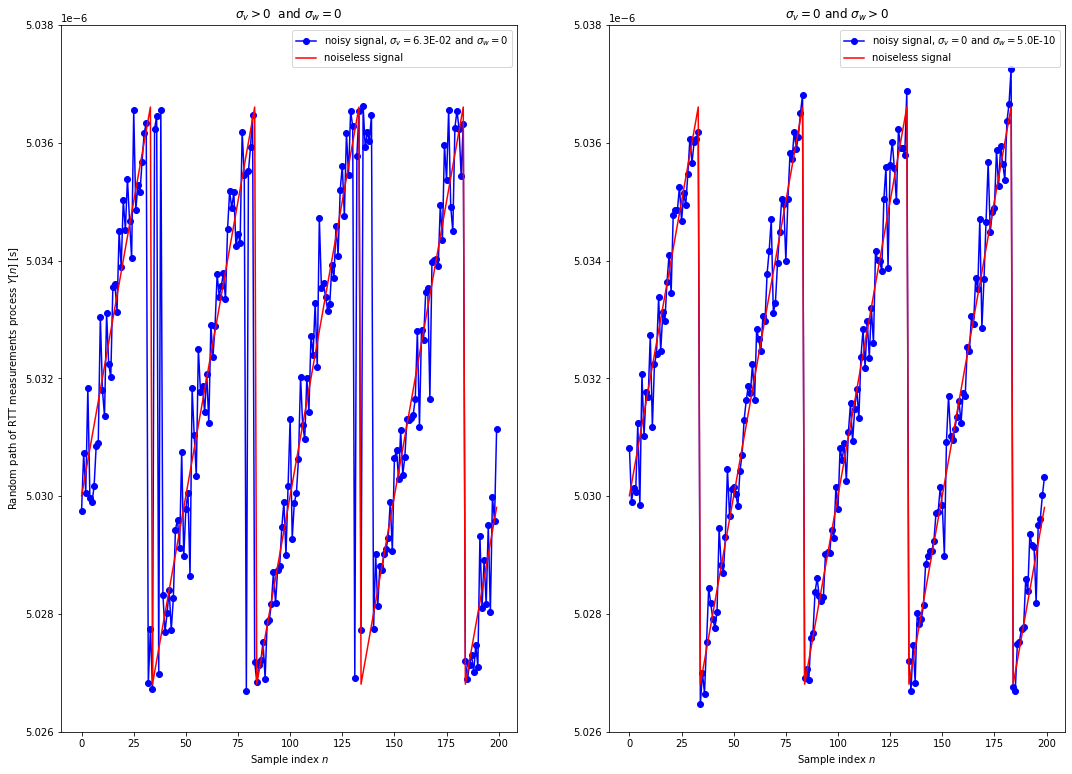

In [3]:
#Number of sampling points
N=200
# Noise standard deviations
w_std = 0.5*10**(-9)
v_std = 10**(-1.2)
# Obtain sampling points
n = np.linspace(0, (N-1), N );

# Plot results
plt.figure( figsize = [18, 13]); 
plt.subplot(121)
plt.plot( n, generate_signal(v_std=v_std,w_std=0 ), 'bo-',label=r'noisy signal, $\sigma_v=$%.1E and $\sigma_w=0$'%( v_std ) ); 
plt.plot( n, generate_signal(v_std=0,w_std=0 ), 'r-',label='noiseless signal' ); 
plt.title( r'$\sigma_v > 0$  and $\sigma_w=0$' );
plt.ylabel( r'Random path of RTT measurements process $Y[n]$ [s]' ); plt.xlabel( r'Sample index $n$');
plt.ylim((5.026*10**(-6),5.038*10**(-6)))
plt.ticklabel_format( style = 'sci', scilimits = (0, 0), axis = 'y' )
plt.legend()
plt.subplot(122)
plt.plot( n, generate_signal(v_std=0,w_std=w_std ), 'bo-',label='noisy signal, $\sigma_v=0$ and $\sigma_w=$%.1E'%( w_std )   );
plt.plot( n, generate_signal(v_std=0,w_std=0 ), 'r-',label='noiseless signal' ); 
plt.title( r'$\sigma_v=0$ and $\sigma_w > 0$ ' );
plt.xlabel( r'Sample index $n$')
plt.ylim((5.026*10**(-6),5.038*10**(-6)))
plt.ticklabel_format( style = 'sci', scilimits = (0, 0), axis = 'y' )
plt.legend()

plt.show()
